In [1]:
# Python
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
import celloracle as co
co.__version__

'0.7.0'

In [3]:
print(sc.__version__)

1.7.2


In [4]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [5]:
co.test_R_libraries_installation()

R path: /home/chsu/anaconda3/envs/celloracle/bin/R
checking R library installation: igraph -> OK
checking R library installation: linkcomm -> OK
checking R library installation: rnetcarto -> OK


In [6]:
save_folder = "figures"
os.makedirs(save_folder, exist_ok=True)

In [7]:
os.chdir('/fast/AG_Ohler/CheWei/celloracle')

In [8]:
import pathlib
pathlib.Path().resolve()

PosixPath('/fast/AG_Ohler/CheWei/celloracle')

In [9]:
id2name = pd.read_table('../proj_sc/cbpsc/features.tsv.gz', compression='gzip', header=None)

In [19]:
# Load root atlas (GEO:GSE152766) SCT assay in h5ad format
seu = sc.read_h5ad("../kallisto-bus/output/Integration/Root_Atlas_SCT.h5ad")

In [20]:
seu.obs['time.celltype.anno.Li.crude']

AAACCCAAGCCATTCA_1        Transition Domain_Atrichoblast
AAACCCAAGCTGTTCA_1               Elongation_Atrichoblast
AAACCCAAGGCGAACT_1                     Elongation_Cortex
AAACCCACACCAGCCA_1                      Distal Columella
AAACCCACACTGGCGT_1                      Distal Columella
                                     ...                
TTTGTCACATCCTTGC_16            Proximal Lateral Root Cap
TTTGTCAGTGATAAGT_16               Elongation_Trichoblast
TTTGTCAGTTGTCTTT_16    Proliferation Domain_Atrichoblast
TTTGTCATCACCGTAA_16      Proliferation Domain_Endodermis
TTTGTCATCGAATCCA_16                 Maturation_Pericycle
Name: time.celltype.anno.Li.crude, Length: 110427, dtype: object

In [21]:
adata = seu

In [23]:
pd.Series(adata.obs['orig.ident']).value_counts()

sc_12       10293
sc_30       10195
sc_1         9759
sc_10_at     9286
sc_11        9177
sc_31        8775
pp1          7667
sc_40        7284
col0         6433
sc_51        6394
sc_37        5870
tnw1         4887
tnw2         3938
sc_9_at      3808
dc1          3378
dc2          3283
Name: orig.ident, dtype: int64

In [24]:
pd.Series(adata.obs['time.celltype.anno.Li.crude']).value_counts()

Proximal Lateral Root Cap                12578
Elongation_Pericycle                     11112
Elongation_Endodermis                     7101
Elongation_Procambium                     6968
Distal Columella                          6771
Elongation_Cortex                         6034
Distal Lateral Root Cap                   5818
Elongation_Atrichoblast                   4669
Maturation_Trichoblast                    4335
Elongation_Trichoblast                    3794
Maturation_Pericycle                      3676
Elongation_Xylem                          3467
Maturation_Atrichoblast                   3381
Proliferation Domain_Atrichoblast         3179
Maturation_Endodermis                     3120
Elongation_Phloem                         2953
Transition Domain_Trichoblast             2235
Maturation_Cortex                         2184
Transition Domain_Atrichoblast            2151
Maturation_Procambium                     2130
Proliferation Domain_Trichoblast          1997
Transition Do

In [25]:
import re

In [26]:
adata.obs['celltype.anno'] = adata.obs['time.celltype.anno.Li.crude']
adata.obs['celltype.anno'] = [re.sub('^Proximal ', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('^Distal ', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('Proliferation Domain_', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('Transition Domain_', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('Elongation_', '',x)for x in adata.obs['celltype.anno']]
adata.obs['celltype.anno'] = [re.sub('Maturation_', '',x)for x in adata.obs['celltype.anno']]

In [27]:
pd.Series(adata.obs['celltype.anno']).value_counts()

Lateral Root Cap    18396
Pericycle           16847
Atrichoblast        13380
Trichoblast         12361
Endodermis          11369
Cortex              11073
Procambium           9307
Columella            8535
Xylem                4838
Phloem               4163
Quiescent Center      158
Name: celltype.anno, dtype: int64

In [28]:
adata.obs['time.anno'] = adata.obs['time.celltype.anno.Li.crude']
adata.obs['time.anno'] = [re.sub('_.*$', '',x)for x in adata.obs['time.anno']]

In [29]:
pd.Series(adata.obs['time.anno']).value_counts()

Elongation                   46098
Maturation                   20707
Proximal Lateral Root Cap    12578
Proliferation Domain          8538
Transition Domain             8153
Distal Columella              6771
Distal Lateral Root Cap       5818
Proximal Columella            1764
Name: time.anno, dtype: int64

In [31]:
adata.obs['celltype.time.anno'] = adata.obs['time.celltype.anno.Li.crude'].astype(str)

In [32]:
pd.Series(adata.obs['celltype.time.anno']).value_counts()

Proximal Lateral Root Cap                12578
Elongation_Pericycle                     11112
Elongation_Endodermis                     7101
Elongation_Procambium                     6968
Distal Columella                          6771
Elongation_Cortex                         6034
Distal Lateral Root Cap                   5818
Elongation_Atrichoblast                   4669
Maturation_Trichoblast                    4335
Elongation_Trichoblast                    3794
Maturation_Pericycle                      3676
Elongation_Xylem                          3467
Maturation_Atrichoblast                   3381
Proliferation Domain_Atrichoblast         3179
Maturation_Endodermis                     3120
Elongation_Phloem                         2953
Transition Domain_Trichoblast             2235
Maturation_Cortex                         2184
Transition Domain_Atrichoblast            2151
Maturation_Procambium                     2130
Proliferation Domain_Trichoblast          1997
Transition Do

In [33]:
adata.layers["raw_count"] = adata.X.copy()

In [34]:
## Save input for CellOracle
adata.write_h5ad("Root_Atlas_Zones_celloracle_input.h5ad")

... storing 'orig.ident' as categorical
... storing 'time.celltype.anno.Li.crude' as categorical
... storing 'time.celltype.anno.Li' as categorical
... storing 'time.celltype.anno' as categorical
... storing 'time.celltype.anno.crude' as categorical
... storing 'celltype.anno' as categorical
... storing 'time.anno' as categorical
... storing 'celltype.time.anno' as categorical


In [10]:
## Downloaded from ARVEX
ADATA = sc.read_h5ad('Root_Atlas_Zones_celloracle_input.h5ad')

In [11]:
ADATA

AnnData object with n_obs × n_vars = 110427 × 24997
    obs: 'orig.ident', 'time.celltype.anno.Li.crude', 'time.celltype.anno.Li', 'time.celltype.anno', 'time.celltype.anno.crude', 'celltype.anno.crude', 'celltype.anno', 'time.anno', 'celltype.time.anno'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw_count'

In [12]:
## Downloaded from ARVEX
wanted_TFs = pd.read_csv("./Kay_TF_thalemine_annotations.csv")

In [13]:
wanted_TFs.head()

,GeneID,Name,Description
0,AT1G01010,NAC001,NAC domain containing protein 1
1,AT1G01030,NGA3,AP2/B3-like transcriptional factor family protein
2,AT1G01060,LHY,Homeodomain-like superfamily protein
3,AT1G01250,AT1G01250,Integrase-type DNA-binding superfamily protein
4,AT1G01260,AT1G01260,basic helix-loop-helix (bHLH) DNA-binding supe...


In [14]:
## Downloaded from ARVEX
DE = pd.read_csv("../proj_sc/cbpsc/WT_Endodermis_Cortex_markers_AUC_0.75.csv", index_col=None)

In [15]:
DE

,myAUC,avg_diff,power,pct.1,pct.2,cluster,celltype,stage,gene,Name,pct.diff,pct.diff_rank,avg_diff_rank,myAUC_rank,combined_rank,long_cor,abs_long_cor
0,0.969,2.904778,0.938,0.986,0.078,Cortex_T0,Cortex,T0,AT2G20490,NOP10,0.908,8,149,2,1,-0.248485,0.248485
1,0.976,3.490443,0.952,1.000,0.105,Endodermis_T0,Endodermis,T0,AT4G18100,RPL32A,0.895,36,46,8,1,-0.660606,0.660606
2,0.952,3.143059,0.904,0.988,0.125,Cortex_T1,Cortex,T1,AT1G57660,RPL21E,0.863,24,57,1,1,-0.709091,0.709091
3,0.950,3.611536,0.900,0.960,0.122,Endodermis_T1,Endodermis,T1,AT1G57660,RPL21E,0.838,26,39,5,1,-0.709091,0.709091
4,0.881,2.655178,0.762,0.878,0.227,Cortex_T2,Cortex,T2,AT5G14020,AT5G14020,0.651,1,9,1,1,-0.975758,0.975758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9772,0.753,0.555805,0.506,0.743,0.329,Cortex_T0,Cortex,T0,AT1G51730,AT1G51730,0.414,2368,2605,1903,2504,-0.951515,0.951515
9773,0.754,0.400531,0.508,0.699,0.273,Cortex_T0,Cortex,T0,AT1G70190,AT1G70190,0.426,2319,2697,1891,2510,-0.781818,0.781818
9774,0.761,0.735704,0.522,0.472,0.123,Cortex_T0,Cortex,T0,AT3G01820,AT3G01820,0.349,2636,2488,1788,2513,-0.030303,0.030303
9775,0.754,0.808599,0.508,0.536,0.173,Cortex_T0,Cortex,T0,AT3G18370,SYTF,0.363,2590,2443,1889,2515,-0.006061,0.006061


In [16]:
len(DE['gene'].unique())

4469

In [17]:
gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']=='endodermis'.capitalize())[0]]).unique())]

In [23]:
pd.Series(gene_of_interest).to_csv('./end_gene_of_interest.csv')

In [48]:
## Load base_GRN (Downloaded from ARVEX)
import pickle

with open("./base_GRN_TG_to_TF_dictionary.pkl", 'rb') as file_handle:
    TG_to_TF_dictionary = pickle.load(file_handle)

## Run CellOracle on each cell types

In [49]:
cortex = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Cortex')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Cortex')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Cortex')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Cortex'))]
endodermis = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Endodermis')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Endodermis')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Endodermis')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Endodermis'))]

In [50]:
print(len(cortex))
print(len(endodermis))

11073
11369


In [51]:
celltypes = {'cortex':cortex, 'endodermis':endodermis}

cortex
Number of genes : 4853
View of AnnData object with n_obs × n_vars = 11073 × 4853
    obs: 'orig.ident', 'time.celltype.anno.Li.crude', 'time.celltype.anno.Li', 'time.celltype.anno', 'time.celltype.anno.crude', 'celltype.anno.crude', 'celltype.anno', 'time.anno', 'celltype.time.anno'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw_count'


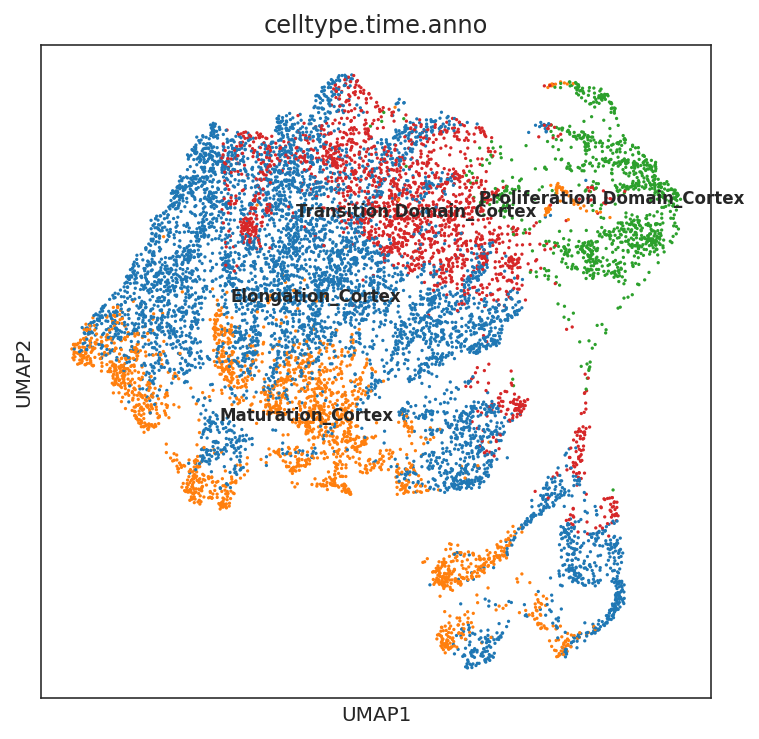

Instantiate Oracle object
Instantiate Oracle object
KNN computation
cell number is :11073
Auto-selected k is :276
GRN construction


  0%|          | 0/4 [00:00<?, ?it/s]

inferring GRN for Elongation_Cortex...


  0%|          | 0/4849 [00:00<?, ?it/s]

In [ ]:
for x in celltypes.keys():
    print(x)
    # Subset the genes
    #if x == 'lrc' :
    #    gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
    #                               ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where((DE['cluster_id']=='Distal Lateral Root Cap') | (DE['cluster_id']=='Proximal Lateral Root Cap'))[0]]).unique())]
    #elif x == 'columella':
    #    gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
    #                               ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where((DE['cluster_id']=='Distal Columella') | (DE['cluster_id']=='Proximal Columella'))[0]]).unique())]
    #else :
    gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']==x.capitalize())[0]]).unique())]
        
    print('Number of genes : '+format(len(gene_of_interest)))
    adata = ADATA[celltypes[x], gene_of_interest]
    print(adata)
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    plt.rcParams["figure.figsize"] = [6, 6]
    sc.pl.umap(adata, color=['celltype.time.anno'], legend_loc='on data', legend_fontsize='small')
    adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
    adata.write_h5ad(x+'_Root_Atlas_SCT_celloracle.h5ad')
    
    print('Instantiate Oracle object')
    oracle = co.Oracle()

    # In this notebook, we use SCT values as an input of Oracle object.
    adata.X = adata.layers["raw_count"].copy()

    print('Instantiate Oracle object')
    oracle.import_anndata_as_raw_count(adata=adata, cluster_column_name="celltype.time.anno",embedding_name="X_umap")
    
    # Import TG_to_TF_dictionary
    oracle.import_TF_data(TFdict=TG_to_TF_dictionary)
    
    print('KNN computation')
    oracle.perform_PCA()
    n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
    n_comps = min(n_comps, 50)
    n_cell = oracle.adata.shape[0]
    print(f"cell number is :{n_cell}")
    k = int(0.025*n_cell)
    print(f"Auto-selected k is :{k}")
    oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=4)
    
    print('GRN construction')
    links = oracle.get_links(cluster_name_for_GRN_unit="celltype.time.anno", alpha=10, verbose_level=10, test_mode=False)
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_Root_Atlas_SCT.links.celloracle.links")
    
    print('Filter Links')
    links.filter_links(p=0.01, weight="coef_abs", threshold_number=20000)
    
    print('Calculate network scores. It takes several minutes')
    links.get_score()
    links.merged_score.head()
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_Root_Atlas_SCT_p01_20k.links.celloracle.links")
    
    print('Save merged score')
    res = links.merged_score
    name = []
    for i in res.index.values:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    res.insert(0, 'name', name)
    res.to_csv(x+"_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
    
    df = pd.DataFrame()
    cluster = []
    
    print('Save network')
    for i in links.links_dict.keys():
        df = df.append(links.filtered_links[i])
        cluster.extend(np.repeat(i, 20000).tolist())
    
    df['cluster'] = cluster
    df = df[['source', 'target', 'cluster', 'coef_mean', 'coef_abs', 'p', '-logp']]
    
    name = []
    for i in df['source']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(1, 'source_name', name)
    name = []
    for i in df['target']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(3, 'target_name', name)
    df.to_csv(x+"_Root_Atlas_SCT_celloracle_network_iGRN.csv")

In [57]:
## Downloaded from ARVEX
DE = pd.read_csv("../proj_sc/cbpsc/WT_Epidermis_LRC_markers_AUC_0.75.csv", index_col=None)

In [58]:
trichoblast = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Trichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Trichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Trichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Trichoblast'))]
atrichoblast = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Atrichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Atrichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Atrichoblast')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Atrichoblast'))]
lrc = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proximal Lateral Root Cap')|(ADATA.obs['time.celltype.anno.Li.crude']=='Distal Lateral Root Cap'))]

In [59]:
print(len(trichoblast))
print(len(atrichoblast))
print(len(lrc))

12361
13380
18396


In [60]:
celltypes = {'trichoblast':trichoblast, 'atrichoblast':atrichoblast, 'lrc':lrc}

trichoblast
Number of genes : 2966
View of AnnData object with n_obs × n_vars = 12361 × 2966
    obs: 'orig.ident', 'time.celltype.anno.Li.crude', 'time.celltype.anno.Li', 'time.celltype.anno', 'time.celltype.anno.crude', 'celltype.anno.crude', 'celltype.anno', 'time.anno', 'celltype.time.anno'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw_count'


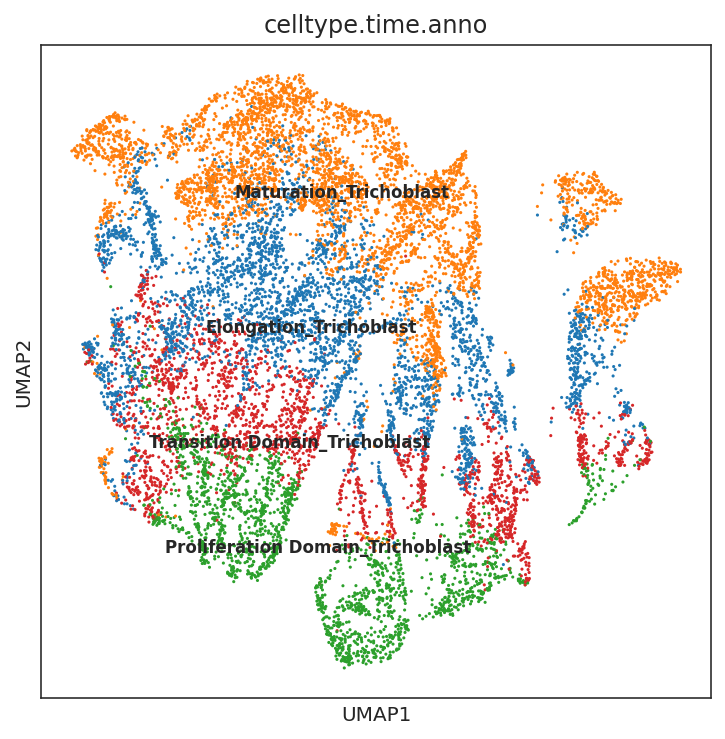

Instantiate Oracle object
Instantiate Oracle object
KNN computation
cell number is :12361
Auto-selected k is :309
GRN construction


  0%|          | 0/4 [00:00<?, ?it/s]

inferring GRN for Elongation_Trichoblast...


  0%|          | 0/2965 [00:00<?, ?it/s]

In [ ]:
for x in celltypes.keys():
    print(x)
    # Subset the genes
    if x == 'lrc' :
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']=='Lateral Root Cap')[0]]).unique())]
    elif x == 'columella':
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']=='Columella')[0]]).unique())]
    else :
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']==x.capitalize())[0]]).unique())]
        
    print('Number of genes : '+format(len(gene_of_interest)))
    adata = ADATA[celltypes[x], gene_of_interest]
    print(adata)
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    plt.rcParams["figure.figsize"] = [6, 6]
    sc.pl.umap(adata, color=['celltype.time.anno'], legend_loc='on data', legend_fontsize='small')
    adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
    adata.write_h5ad(x+'_Root_Atlas_SCT_celloracle.h5ad')
    
    print('Instantiate Oracle object')
    oracle = co.Oracle()

    # In this notebook, we use SCT values as an input of Oracle object.
    adata.X = adata.layers["raw_count"].copy()

    print('Instantiate Oracle object')
    oracle.import_anndata_as_raw_count(adata=adata, cluster_column_name="celltype.time.anno",embedding_name="X_umap")
    
    # Import TG_to_TF_dictionary
    oracle.import_TF_data(TFdict=TG_to_TF_dictionary)
    
    print('KNN computation')
    oracle.perform_PCA()
    n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
    n_comps = min(n_comps, 50)
    n_cell = oracle.adata.shape[0]
    print(f"cell number is :{n_cell}")
    k = int(0.025*n_cell)
    print(f"Auto-selected k is :{k}")
    oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=4)
    
    print('GRN construction')
    links = oracle.get_links(cluster_name_for_GRN_unit="celltype.time.anno", alpha=10, verbose_level=10, test_mode=False)
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_Root_Atlas_SCT.links.celloracle.links")
    
    print('Filter Links')
    links.filter_links(p=0.01, weight="coef_abs", threshold_number=20000)
    
    print('Calculate network scores. It takes several minutes')
    links.get_score()
    links.merged_score.head()
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_Root_Atlas_SCT_p01_20k.links.celloracle.links")
    
    print('Save merged score')
    res = links.merged_score
    name = []
    for i in res.index.values:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    res.insert(0, 'name', name)
    res.to_csv(x+"_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
    
    df = pd.DataFrame()
    cluster = []
    
    print('Save network')
    for i in links.links_dict.keys():
        df = df.append(links.filtered_links[i])
        cluster.extend(np.repeat(i, 20000).tolist())
    
    df['cluster'] = cluster
    df = df[['source', 'target', 'cluster', 'coef_mean', 'coef_abs', 'p', '-logp']]
    
    name = []
    for i in df['source']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(1, 'source_name', name)
    name = []
    for i in df['target']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(3, 'target_name', name)
    df.to_csv(x+"_Root_Atlas_SCT_celloracle_network_iGRN.csv")

In [65]:
## Downloaded from ARVEX
DE = pd.read_csv("../proj_sc/cbpsc/WT_Stele_markers_AUC_0.75.csv", index_col=None)

In [67]:
pericycle = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Pericycle')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Pericycle')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Pericycle')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Pericycle'))]
phloem = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Phloem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Phloem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Phloem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Phloem'))]
xylem = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Xylem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Xylem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Xylem')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Xylem'))]
procambium = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proliferation Domain_Procambium')|(ADATA.obs['time.celltype.anno.Li.crude']=='Elongation_Procambium')|(ADATA.obs['time.celltype.anno.Li.crude']=='Transition Domain_Procambium')|(ADATA.obs['time.celltype.anno.Li.crude']=='Maturation_Procambium'))]

In [68]:
print(len(pericycle))
print(len(phloem))
print(len(xylem))
print(len(procambium))

16847
4163
4838
9307


In [69]:
celltypes = {'pericycle':pericycle, 'phloem':phloem, 'xylem':xylem, 'procambium':procambium}

pericycle
Number of genes : 2902
View of AnnData object with n_obs × n_vars = 16847 × 2902
    obs: 'orig.ident', 'time.celltype.anno.Li.crude', 'time.celltype.anno.Li', 'time.celltype.anno', 'time.celltype.anno.crude', 'celltype.anno.crude', 'celltype.anno', 'time.anno', 'celltype.time.anno'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw_count'


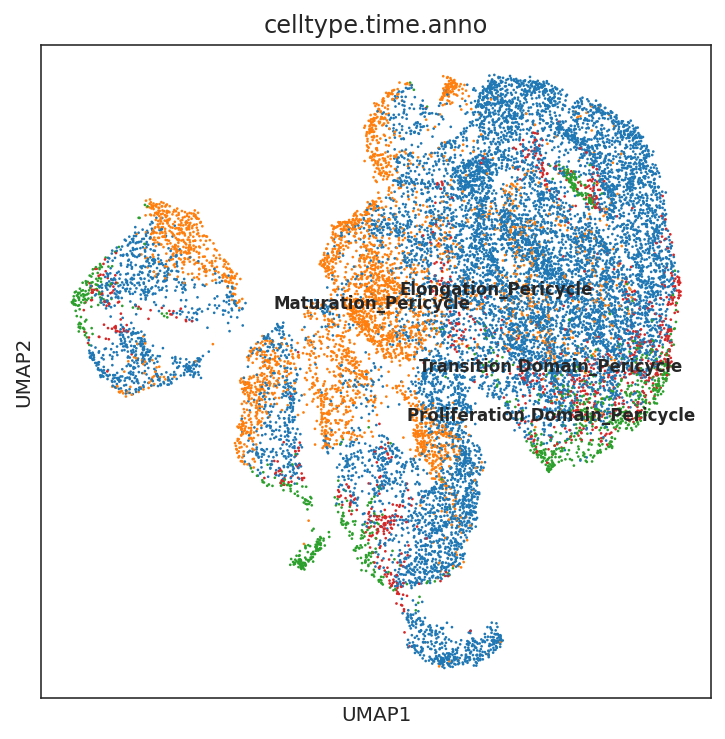

Instantiate Oracle object
Instantiate Oracle object
KNN computation
cell number is :16847
Auto-selected k is :421
GRN construction


  0%|          | 0/4 [00:00<?, ?it/s]

inferring GRN for Elongation_Pericycle...


  0%|          | 0/2900 [00:00<?, ?it/s]

inferring GRN for Maturation_Pericycle...


  0%|          | 0/2900 [00:00<?, ?it/s]

inferring GRN for Proliferation Domain_Pericycle...


  0%|          | 0/2900 [00:00<?, ?it/s]

inferring GRN for Transition Domain_Pericycle...


  0%|          | 0/2900 [00:00<?, ?it/s]

Save Links object
Filter Links
Calculate network scores. It takes several minutes
processing... batch 1/1
Elongation_Pericycle: finished.
Maturation_Pericycle: finished.
Proliferation Domain_Pericycle: finished.
Transition Domain_Pericycle: finished.
Save Links object
Save merged score
Save network
phloem
Number of genes : 3391
View of AnnData object with n_obs × n_vars = 4163 × 3391
    obs: 'orig.ident', 'time.celltype.anno.Li.crude', 'time.celltype.anno.Li', 'time.celltype.anno', 'time.celltype.anno.crude', 'celltype.anno.crude', 'celltype.anno', 'time.anno', 'celltype.time.anno'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw_count'


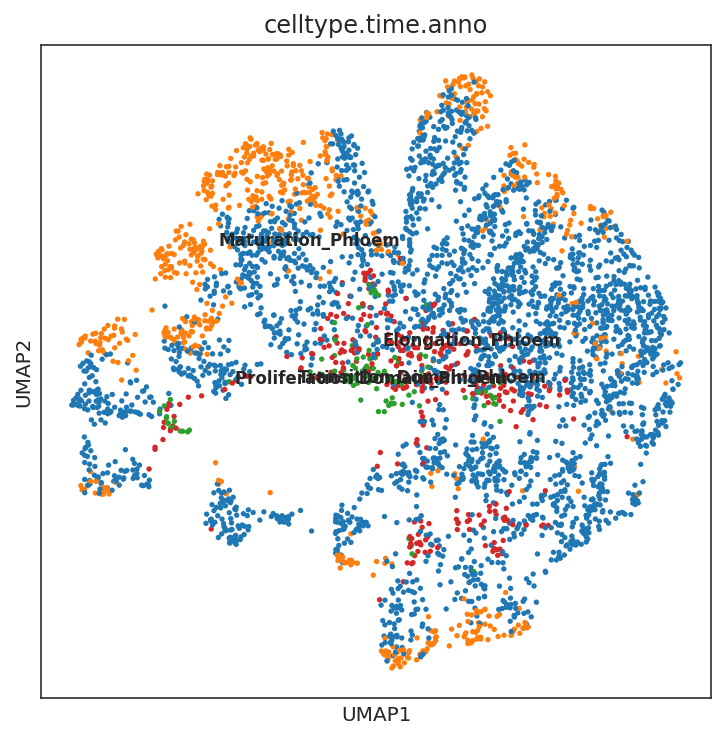

Instantiate Oracle object
Instantiate Oracle object
KNN computation
cell number is :4163
Auto-selected k is :104
GRN construction


  0%|          | 0/4 [00:00<?, ?it/s]

inferring GRN for Elongation_Phloem...


  0%|          | 0/3388 [00:00<?, ?it/s]

In [ ]:
for x in celltypes.keys():
    print(x)
    # Subset the genes
    if x == 'lrc' :
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']=='Lateral Root Cap')[0]]).unique())]
    elif x == 'columella':
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']=='Columella')[0]]).unique())]
    else :
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']==x.capitalize())[0]]).unique())]
        
    print('Number of genes : '+format(len(gene_of_interest)))
    adata = ADATA[celltypes[x], gene_of_interest]
    print(adata)
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    plt.rcParams["figure.figsize"] = [6, 6]
    sc.pl.umap(adata, color=['celltype.time.anno'], legend_loc='on data', legend_fontsize='small')
    adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
    adata.write_h5ad(x+'_Root_Atlas_SCT_celloracle.h5ad')
    
    print('Instantiate Oracle object')
    oracle = co.Oracle()

    # In this notebook, we use SCT values as an input of Oracle object.
    adata.X = adata.layers["raw_count"].copy()

    print('Instantiate Oracle object')
    oracle.import_anndata_as_raw_count(adata=adata, cluster_column_name="celltype.time.anno",embedding_name="X_umap")
    
    # Import TG_to_TF_dictionary
    oracle.import_TF_data(TFdict=TG_to_TF_dictionary)
    
    print('KNN computation')
    oracle.perform_PCA()
    n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
    n_comps = min(n_comps, 50)
    n_cell = oracle.adata.shape[0]
    print(f"cell number is :{n_cell}")
    k = int(0.025*n_cell)
    print(f"Auto-selected k is :{k}")
    oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=4)
    
    print('GRN construction')
    links = oracle.get_links(cluster_name_for_GRN_unit="celltype.time.anno", alpha=10, verbose_level=10, test_mode=False)
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_Root_Atlas_SCT.links.celloracle.links")
    
    print('Filter Links')
    links.filter_links(p=0.01, weight="coef_abs", threshold_number=20000)
    
    print('Calculate network scores. It takes several minutes')
    links.get_score()
    links.merged_score.head()
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_Root_Atlas_SCT_p01_20k.links.celloracle.links")
    
    print('Save merged score')
    res = links.merged_score
    name = []
    for i in res.index.values:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    res.insert(0, 'name', name)
    res.to_csv(x+"_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
    
    df = pd.DataFrame()
    cluster = []
    
    print('Save network')
    for i in links.links_dict.keys():
        df = df.append(links.filtered_links[i])
        cluster.extend(np.repeat(i, 20000).tolist())
    
    df['cluster'] = cluster
    df = df[['source', 'target', 'cluster', 'coef_mean', 'coef_abs', 'p', '-logp']]
    
    name = []
    for i in df['source']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(1, 'source_name', name)
    name = []
    for i in df['target']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(3, 'target_name', name)
    df.to_csv(x+"_Root_Atlas_SCT_celloracle_network_iGRN.csv")

In [ ]:
DE = pd.read_csv("../proj_sc/cbpsc/WT_Columella_markers_AUC_0.75.csv", index_col=None)

In [ ]:
DE

In [ ]:
columella = ADATA.obs.index[np.where((ADATA.obs['time.celltype.anno.Li.crude']=='Proximal Columella')|(ADATA.obs['time.celltype.anno.Li.crude']=='Distal Columella'))]

In [ ]:
celltypes = {'columella':columella}

In [ ]:
for x in celltypes.keys():
    print(x)
    # Subset the genes
    if x == 'lrc' :
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']=='Lateral Root Cap')[0]]).unique())]
    elif x == 'columella':
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']=='Columella')[0]]).unique())]
    else :
        gene_of_interest = ADATA.var.index[ADATA.var.index.isin(wanted_TFs['GeneID'])|
                                   ADATA.var.index.isin(pd.Series(np.array(DE['gene'])[np.where(DE['celltype']==x.capitalize())[0]]).unique())]
        
    print('Number of genes : '+format(len(gene_of_interest)))
    adata = ADATA[celltypes[x], gene_of_interest]
    print(adata)
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    plt.rcParams["figure.figsize"] = [6, 6]
    sc.pl.umap(adata, color=['celltype.time.anno'], legend_loc='on data', legend_fontsize='small')
    adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
    adata.write_h5ad(x+'_Root_Atlas_SCT_celloracle.h5ad')
    
    print('Instantiate Oracle object')
    oracle = co.Oracle()

    # In this notebook, we use SCT values as an input of Oracle object.
    adata.X = adata.layers["raw_count"].copy()

    print('Instantiate Oracle object')
    oracle.import_anndata_as_raw_count(adata=adata, cluster_column_name="celltype.time.anno",embedding_name="X_umap")
    
    # Import TG_to_TF_dictionary
    oracle.import_TF_data(TFdict=TG_to_TF_dictionary)
    
    print('KNN computation')
    oracle.perform_PCA()
    n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
    n_comps = min(n_comps, 50)
    n_cell = oracle.adata.shape[0]
    print(f"cell number is :{n_cell}")
    k = int(0.025*n_cell)
    print(f"Auto-selected k is :{k}")
    oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=4)
    
    print('GRN construction')
    links = oracle.get_links(cluster_name_for_GRN_unit="celltype.time.anno", alpha=10, verbose_level=10, test_mode=False)
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_Root_Atlas_SCT.links.celloracle.links")
    
    print('Filter Links')
    links.filter_links(p=0.01, weight="coef_abs", threshold_number=20000)
    
    print('Calculate network scores. It takes several minutes')
    links.get_score()
    links.merged_score.head()
    
    print('Save Links object')
    links.to_hdf5(file_path=x+"_Root_Atlas_SCT_p01_20k.links.celloracle.links")
    
    print('Save merged score')
    res = links.merged_score
    name = []
    for i in res.index.values:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    res.insert(0, 'name', name)
    res.to_csv(x+"_Root_Atlas_SCT_celloracle_gene_score_iGRN.csv")
    
    df = pd.DataFrame()
    cluster = []
    
    print('Save network')
    for i in links.links_dict.keys():
        df = df.append(links.filtered_links[i])
        cluster.extend(np.repeat(i, 20000).tolist())
    
    df['cluster'] = cluster
    df = df[['source', 'target', 'cluster', 'coef_mean', 'coef_abs', 'p', '-logp']]
    
    name = []
    for i in df['source']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(1, 'source_name', name)
    name = []
    for i in df['target']:
        name.append(id2name[1][np.where(id2name[0]==i)[0]].tolist()[0])
    df.insert(3, 'target_name', name)
    df.to_csv(x+"_Root_Atlas_SCT_celloracle_network_iGRN.csv")